In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dbetes = pd.read_csv("diabetes.csv")
dbetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dbetes.shape

(768, 9)

In [4]:
dbetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
dbetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02214a96d8>,
      dtype=object)

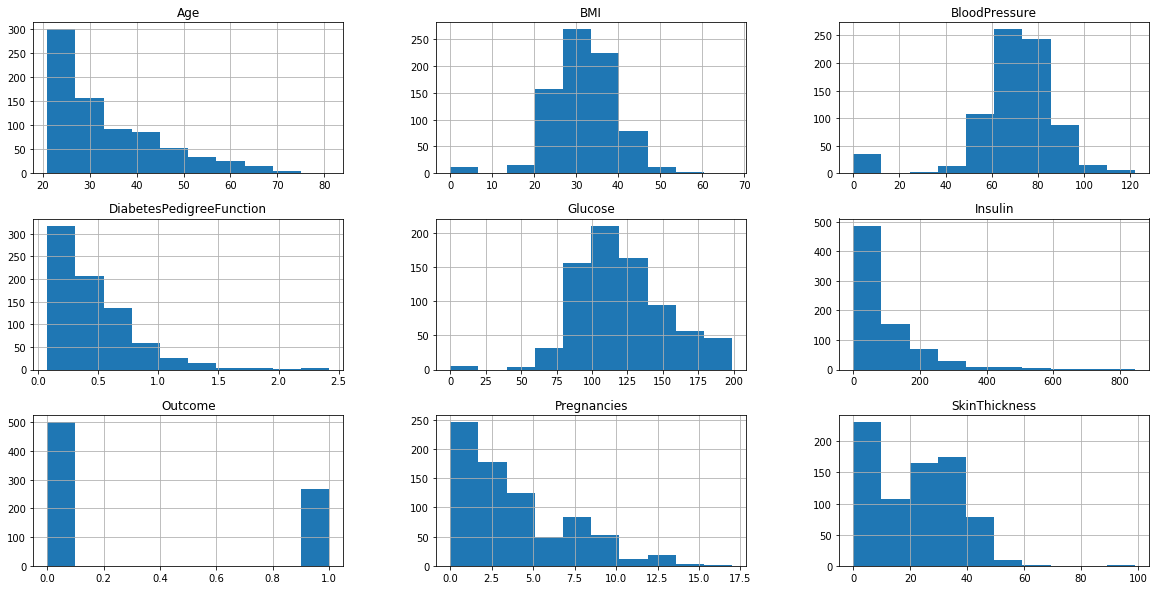

In [6]:
dbetes.hist(figsize=(20,10))

In [7]:
dbetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
dbetes_ct = dbetes.Outcome.value_counts()

class 0: 500
class 1: 268
proportion: 1.87 : 1


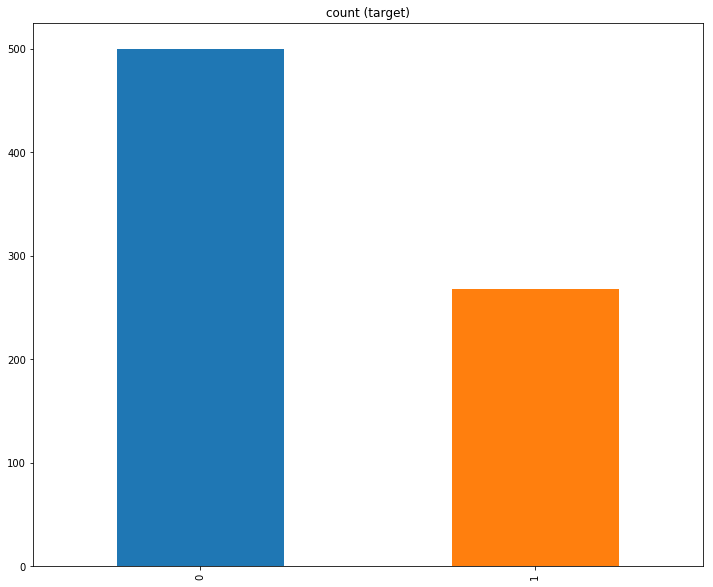

In [9]:
print('class 0:', dbetes_ct[0])
print('class 1:', dbetes_ct[1])
print('proportion:', round(dbetes_ct[0] / dbetes_ct[1], 2), ': 1') 

dbetes_ct.plot(kind='bar', title='count (target)', figsize=(12,10));

In [10]:
y = dbetes.Outcome
x = dbetes.drop('Outcome', axis=1)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 27)

In [12]:
#classifier 
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear')

In [13]:
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_pred = logistic_model.predict(x_test)

In [15]:
pd.crosstab(y_pred, y_test)

Outcome,0,1
row_0,,
0,111,31
1,19,31


In [16]:
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred)

0.7395833333333334

In [17]:
metrics.precision_score(y_test, y_pred)

0.62

In [18]:
metrics.recall_score(y_test, y_pred)

0.5

In [19]:
 x = pd.concat([x_train, y_train], axis=1)

In [20]:
x = x.reset_index(drop=True)

In [21]:
non_diabetic = dbetes[dbetes.Outcome==0]
diabetic = dbetes[dbetes.Outcome==1]

In [22]:
from sklearn.utils import resample

In [23]:
#setting over sampled data:
over_sampled = resample(diabetic,
                       replace = True,
                       n_samples = len(non_diabetic),
                       random_state = 27)

In [24]:
over_sampled = pd.concat([non_diabetic, over_sampled])

over_sampled = over_sampled.reset_index(drop=True)

In [25]:
over_sampled.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
83,2,125,60,20,140,33.8,0.088,31,0
63,1,151,60,0,0,26.1,0.179,22,0
920,5,115,76,0,0,31.2,0.343,44,1
768,0,123,72,0,0,36.3,0.258,52,1
160,1,193,50,16,375,25.9,0.655,24,0


In [26]:
outcome_ct = over_sampled.Outcome.value_counts()

class 0: 500
class 1: 500
proportion: 1.0 : 1


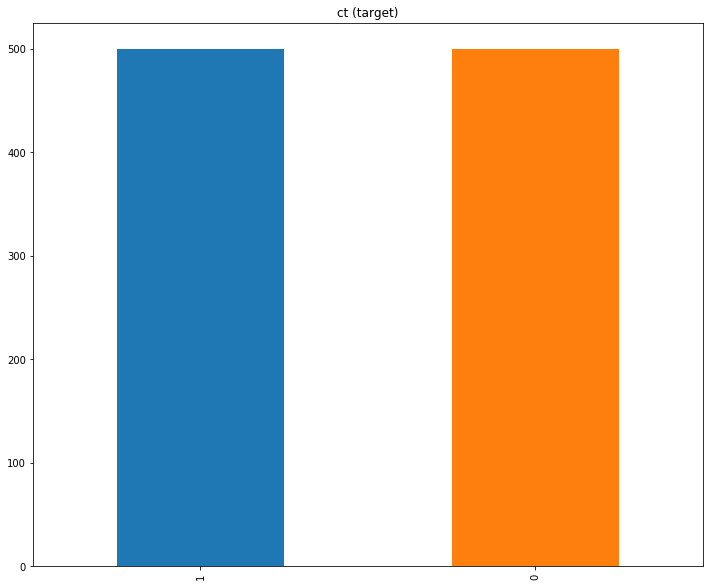

In [27]:
print('class 0:', outcome_ct[0])
print('class 1:', outcome_ct[1])
print('proportion:', round(outcome_ct[0] / outcome_ct[1], 2), ': 1')

outcome_ct.plot(kind='bar', title='ct (target)', figsize = (12,10));

In [28]:
y_train = over_sampled.Outcome

x_train = over_sampled.drop('Outcome', axis=1)

In [29]:
logistic_model = LogisticRegression(solver='liblinear')

In [30]:
logistic_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
 y_pred = logistic_model.predict(x_test)

In [32]:
pd.crosstab(y_pred, y_test)

Outcome,0,1
row_0,,
0,99,17
1,31,45


In [34]:
metrics.accuracy_score(y_test, y_pred)

0.75

In [35]:
metrics.precision_score(y_test, y_pred)

0.5921052631578947

In [36]:
metrics.recall_score(y_test, y_pred)

0.7258064516129032